## Image Compression

The purpose of compression is the representation of images by methods that require less units of information (e.g., bytes) than the mere storage of each pixel in arrays.

For instance, recall the binary image we constructed in the first section: this is a 128-by-128 image represented by 16,384 bits (`True`/`False`) where all but 113 of those bits are `False`.  There surely must be most efficient ways to store this information exactly that require less than 16,384 bits.  We could very well do so by simply providing the size of the canvas (two bytes), the location of the center of the disk (two more bytes), and the value of its radius (another byte).  We have now a new representation using only 40 bits (assuming each byte consists of 8 bits).  We refer to such exact representation as a *lossless compression*.  

Another possible way to compress an image is the process of turning a color image into its black-and-white representation, for example.  We performed this operation on the image `skimage.data.coffee()`, turning thus an object of size 3-by-400-by-600 (720,000 bytes) into an object of size 400-by-600 (240,000 bytes).  In the process we have _lost_ the ability of see its color, though.  This kind of operation is appropriately called a *lossy compression*.

In the following pages we are going to explore several settings for image compression from a mathematical point of view.  We also develop efficient code to perform these operations from within the `scipy` stack.  We are not concerned with the creation of code to read or save these compressed images to file---for that, we already have reliable utilities in the *Python Imaging Library*, that have also been imported to different functions in the modules `scipy.misc`, `scipy.ndimage` and the toolkit `scikit-image`.  If we wish to compress and store a `numpy` array `A` representing a black-and-white photography as different file types, we simply issue something in these lines:

In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.misc import lena, imsave

%matplotlib inline

A = lena()

imsave("my_image.png", A)
imsave("my_image.tiff", A)
imsave("my_image.pcx", A)
imsave("my_image.jpg", A)
imsave("my_image.gif", A)

A quick visualization of the contents of the folder in which we are working shows the sizes of the files created.  For instance, under a `*NIX` system, we could issue the following:

In [2]:
!ls -nh my_image.*

-rw-r--r--@ 1 501  20   288K Jul 28 17:40 my_image.gif
-rw-r--r--@ 1 501  20    35K Jul 28 17:40 my_image.jpg
-rw-r--r--@ 1 501  20   273K Jul 28 17:40 my_image.pcx
-rw-r--r--@ 1 501  20   155K Jul 28 17:40 my_image.png
-rw-r--r--@ 1 501  20   256K Jul 28 17:40 my_image.tiff


Note the different sizes of the resulting files.  The lossless formats `PCX`, `BMP` and `TIFF` offer similar compression rates (273, 257 and 256 K respectively).  On the other hand, the `JPEG` lossy format, offers an obvious improvement (35K).

### Lossless Compression

Some of the most common lossless compression schemes used for image processing are the following.

* *Run-length encoding*.  This method is used in `PCX`, `BMP`, `TGA` and `TIFF` file types, when the original image can be regarded as palette-based bitmapped---think a cartoon, or a computer icon.
* *Lempel-Ziv-Welch*.  *LZW* for short.  This is used by default in the `GIF` image format.
* *Deflation*. Very powerful and reliable, it is the method used for `PNG` image files.  It is also the compression method employed to create `ZIP` files.
* *Chain code*.  This is the preferred method to encode binary images, especially if these contain a small number of large blobs.

Let us examine, for instance, how run-length encoding works in a suitable example.  Consider the checkerboard image `skimage.data.checkerboad()`.  We receive it as a 200-by-200 array of integer values, and in this way it requires 40,000 bytes of storage.  Note it can be regarded a palette-based bitmat with only two colors.  We start by transforming each zero value to a 'B', and each 255 to a 'W':


In [3]:
from skimage.data import checkerboard

def color(value):
    if value==0: return 'B'
    else: return 'W'

image = np.vectorize(color)(checkerboard())
print image

[['W' 'W' 'W' ..., 'B' 'B' 'B']
 ['W' 'W' 'W' ..., 'B' 'B' 'B']
 ['W' 'W' 'W' ..., 'B' 'B' 'B']
 ..., 
 ['B' 'B' 'B' ..., 'W' 'W' 'W']
 ['B' 'B' 'B' ..., 'W' 'W' 'W']
 ['B' 'B' 'B' ..., 'W' 'W' 'W']]


Next, we create a function that encodes both lists and strings of characters, producing instead a string composed of patterns of the form "single character + count."

In [4]:
from itertools import groupby

def runlength(string):
    groups = [k + str(sum(1 for _ in g)) for k,g in groupby(string)]
    return ''.join(groups)

Notice what happens when we re-write the image as a flattened string containing its colors, and encode in this fashion:


In [5]:
coded_image = runlength(image.flatten().tolist())

print coded_image

W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W26B23W27B23W27B23W27B24W400B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27B23W27B23W26B24W27B23W27

In [6]:
len(coded_image)

4474

We have reduced its size to a mere 4,474 bytes.  Now, how would you decode this information back to an image?  Imagine you are provided with this string, the additional information of the size of the image (200-by-200), and the palette information (`B` for black, and `W` for white).

Another nice exercise is to find descriptions of the other mentioned lossless compression methods, and write `python` codes for their corresponding encoder and decoder. 

### Lossy compression

Among the many possible schemes of lossy compression, we are going to focus in the method of *transform Coding*.  The file type `JPEG`, for instance, is based on the discrete cosine transform.

In any of these cases the process is similar:  We assume that the image is a function.  Its visualization can be regarded as a representation of its graph, and as such this is a spatial operation.  Instead, we may compute a transform of the image (say, Fourier, Discrete Cosine, or Wavelet).  The image is now represented by a collection of values: the coefficients of the function in the corresponding transform.  Now, compression occurs when we disregard a large quantity of those coefficients, and reconstruct the function with the corresponding inverse transform.

We have already observed the behavior of reconstruction of an image after disregarding 25% of its lower frequencies, when addressing the Fourier Analysis techniques in the previous section.  This is not the only way to disregard coefficients.  For instance, we may instead collect coefficients with large enough absolute value.  Let us examine the result of performing that operation on the same image, this time using the discrete cosine transform.

In [7]:
from skimage.data import text
from scipy.fftpack import dct, idct

image = text().astype('float')

image_DCT = dct(image)

Let us disregard those values that are less than or equal to 1000 in absolute value.  Note that there are more than 256,317 such coefficients (almost 98% of the original data!)


In [8]:
mask = np.absolute(image_DCT)>1000

compressed = idct(image_DCT * mask)

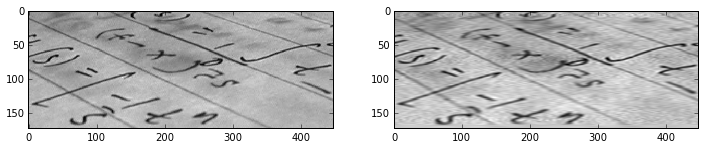

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(text())
plt.gray()
plt.subplot(122)
plt.imshow(compressed)
plt.show()

In spite of having thrown away most of the coefficients, the reconstruction is very faithful.  There are obvious artifacts, but these are not too distracting.

We may perform a similar operation using the wavelet transform.  A naive way to perform compression in this setting could be to disregard whole levels of coefficients, and then reconstruct.  In the example that we covered in the previous sections (a Haar wavelet representation of the image `skimage.data.camera()` with nine levels of coefficientes), if we eliminate the last two levels, we are throwing away 245,760 coefficients (almost 94% of the original information).  Observe the quality of the reconstruction:


In [12]:
import pywt
from skimage.data import camera

levels = int(np.floor(np.log2(camera().shape).max()))

wavelet = pywt.Wavelet('haar')

wavelet_coeffs = pywt.wavedec2(camera(), wavelet, level=levels)

compressed = pywt.waverec2(wavelet_coeffs[:8], wavelet)

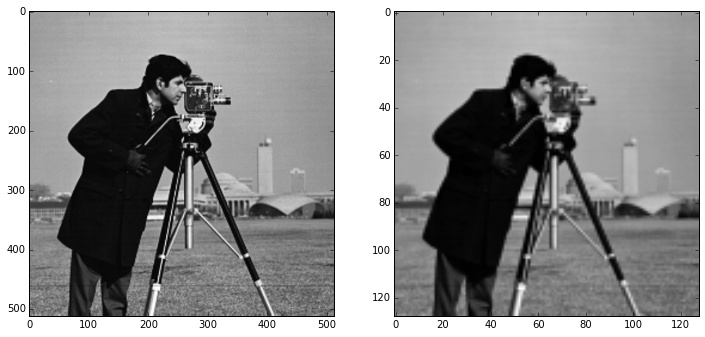

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(camera())
plt.subplot(122)
plt.imshow(compressed)
plt.show()

Similar to _transform coding_ is the method of compression by *singular value decomposition*.  In this case, we regard an image as a matrix.  We represent it by means of its singular values.  Compression in this setting occurs when we disregard a large quantity of the smaller singular values, and then reconstruct.  For an example of this technique, read chapter 3 (Scipy for Linear Algebra) of the book "Learning Scipy for Numerical and Scientific Computing. 2nd ed."
